In [10]:
import pandas as pd
import numpy as np

# 난수 고정 (재현 가능성)
np.random.seed(1234)

date_range = pd.date_range(start="2025-06-01", periods=20, freq="H")
regions = ["Seoul", "Busan", "Incheon"]
region_list = np.random.choice(regions, size=20)

temperature = np.random.uniform(20, 35, size=20)  # 20 ~ 35도 사이
humidity = np.random.uniform(40, 80, size=20)     # 40 ~ 80% 사이

# 3. 무작위로 일부 결측치 삽입
nan_indices_temp = np.random.choice(20, size=15, replace=False)
nan_indices_humidity = np.random.choice(20, size=12, replace=False)

temperature[nan_indices_temp] = np.nan
humidity[nan_indices_humidity] = np.nan

# 4. DataFrame 생성
df = pd.DataFrame({
    "datetime": date_range,
    "region": region_list,
    "temperature": temperature,
    "humidity": humidity,
    "rain": np.full(20, np.nan),
})

df

,datetime,region,temperature,humidity,rain
0,2025-06-01 00:00:00,Incheon,NaN,41.622246,NaN
1,2025-06-01 01:00:00,Busan,NaN,61.924783,NaN
2,2025-06-01 02:00:00,Seoul,21.473779,58.503064,NaN
3,2025-06-01 03:00:00,Seoul,NaN,NaN,NaN
4,2025-06-01 04:00:00,Seoul,NaN,53.116483,NaN
5,2025-06-01 05:00:00,Busan,NaN,NaN,NaN
6,2025-06-01 06:00:00,Busan,NaN,NaN,NaN
7,2025-06-01 07:00:00,Busan,NaN,41.897059,NaN
8,2025-06-01 08:00:00,Incheon,NaN,NaN,NaN
9,2025-06-01 09:00:00,Incheon,NaN,NaN,NaN


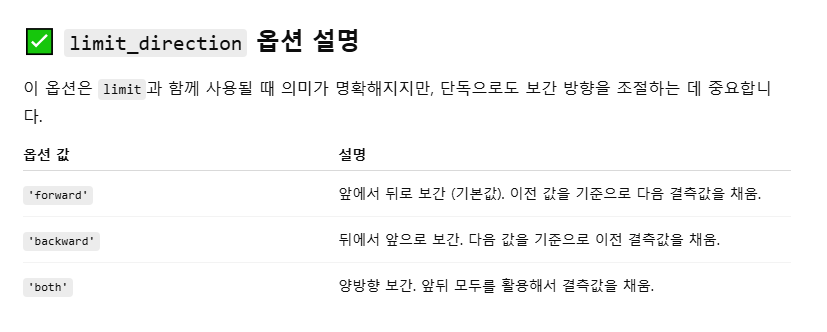

In [14]:
df['temp_ip'] = df['temperature'].interpolate(limit_direction='both')
df

,datetime,region,temperature,humidity,rain,temp_ip
0,2025-06-01 00:00:00,Incheon,NaN,41.622246,NaN,21.473779
1,2025-06-01 01:00:00,Busan,NaN,61.924783,NaN,21.473779
2,2025-06-01 02:00:00,Seoul,21.473779,58.503064,NaN,21.473779
3,2025-06-01 03:00:00,Seoul,NaN,NaN,NaN,22.023649
4,2025-06-01 04:00:00,Seoul,NaN,53.116483,NaN,22.573519
5,2025-06-01 05:00:00,Busan,NaN,NaN,NaN,23.123389
6,2025-06-01 06:00:00,Busan,NaN,NaN,NaN,23.673259
7,2025-06-01 07:00:00,Busan,NaN,41.897059,NaN,24.223128
8,2025-06-01 08:00:00,Incheon,NaN,NaN,NaN,24.772998
9,2025-06-01 09:00:00,Incheon,NaN,NaN,NaN,25.322868


In [22]:
# 지역별 보간
df_result = pd.DataFrame()
for r in df['region'].unique():
    df_tmp = df[df['region'] == r].copy()
    df_tmp = df_tmp.interpolate(limit_direction='both')
    
    df_result = pd.concat([df_result, df_tmp], axis=0)

df_result

,datetime,region,temperature,humidity,rain,temp_ip
0,2025-06-01 00:00:00,Incheon,28.072218,41.622246,NaN,21.473779
8,2025-06-01 08:00:00,Incheon,28.072218,43.398806,NaN,24.772998
9,2025-06-01 09:00:00,Incheon,28.072218,45.175365,NaN,25.322868
10,2025-06-01 10:00:00,Incheon,28.072218,46.951925,NaN,25.872738
13,2025-06-01 13:00:00,Incheon,28.072218,48.728484,NaN,27.522348
14,2025-06-01 14:00:00,Incheon,28.072218,50.505044,NaN,28.072218
15,2025-06-01 15:00:00,Incheon,31.859332,50.505044,NaN,31.859332
1,2025-06-01 01:00:00,Busan,NaN,61.924783,NaN,21.473779
5,2025-06-01 05:00:00,Busan,NaN,55.248875,NaN,23.123389
6,2025-06-01 06:00:00,Busan,NaN,48.572967,NaN,23.673259
